Seaborn is an amazing visualization library for statistical graphics plotting in Python.
Seaborn divides the plot into the below categories
1. Relational plots: This plot is used to understand the relation between two variables.
2. Categorical plots: This plot deals with categorical variables and how they can be visualized.
3. Distribution plots: This plot is used for examining univariate and bivariate distributions
4. Regression plots: The regression plots in Seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.
5. Matrix plots: A matrix plot is an array of scatterplots.
6. Multi-plot grids: It is a useful approach to draw multiple instances of the same plot on different subsets of the dataset.

Datasets loaded: tips (rows=244), iris (rows=150)


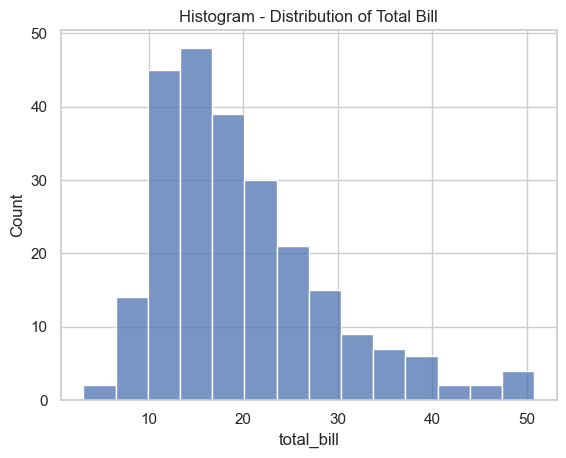

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_theme(style='whitegrid')
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
print('Datasets loaded: tips (rows={}), iris (rows={})'.format(len(tips), len(iris)))
tips.head()
sns.histplot(tips['total_bill'], kde=False)
plt.title('Histogram - Distribution of Total Bill')
plt.show()
 

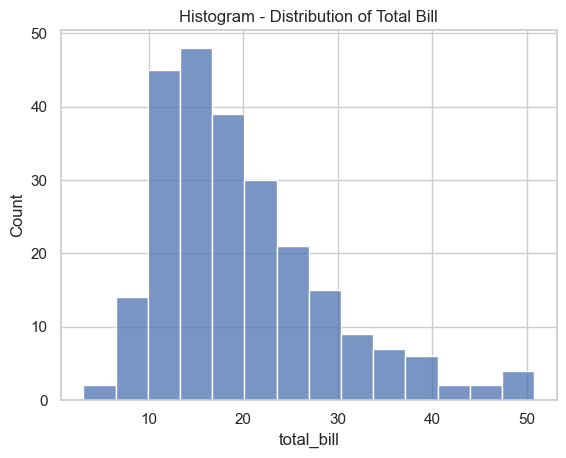

In [2]:
sns.histplot(tips['total_bill'], kde=False)
plt.title('Histogram - Distribution of Total Bill')
plt.show()

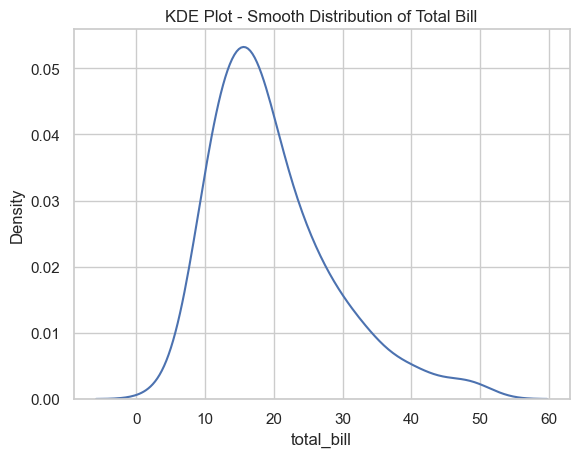

In [3]:
# KDE Plot
sns.kdeplot(tips['total_bill'])
plt.title('KDE Plot - Smooth Distribution of Total Bill')
plt.show()

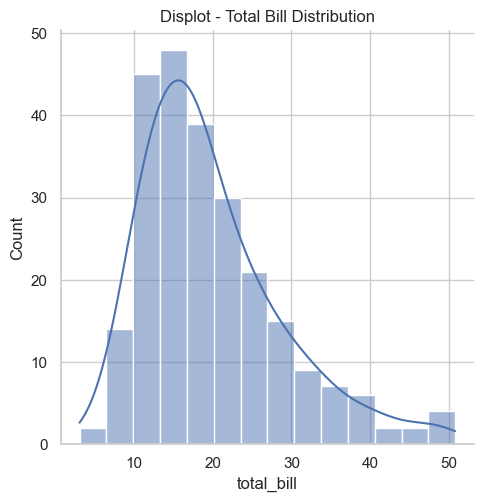

In [4]:
# Displot (Histogram + KDE)
sns.displot(tips['total_bill'], kde=True)
plt.title('Displot - Total Bill Distribution')
plt.show()

## 3. Categorical Plots (Why: compare groups/categories)
 
- **Barplot** (`sns.barplot`): shows aggregate (mean) for categories.
- **Countplot** (`sns.countplot`): shows counts of categorical values.
- **Boxplot** (`sns.boxplot`): shows median, quartiles, and outliers.
- **Violinplot** (`sns.violinplot`): boxplot + KDE.
Use `hue` to split by another categorical variable.

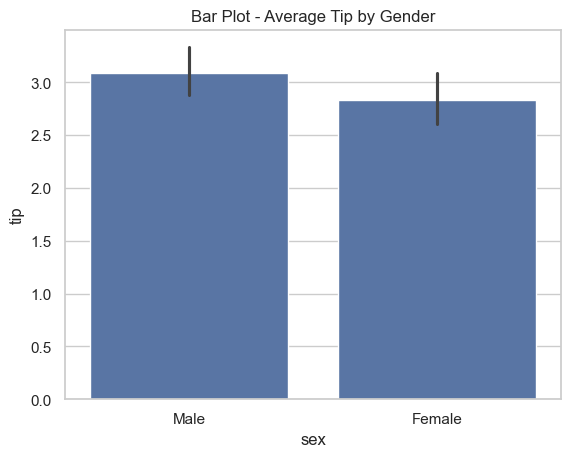

In [5]:
# Bar Plot - Average Tip by Gender
sns.barplot(x='sex', y='tip', data=tips)
plt.title('Bar Plot - Average Tip by Gender')
plt.show()

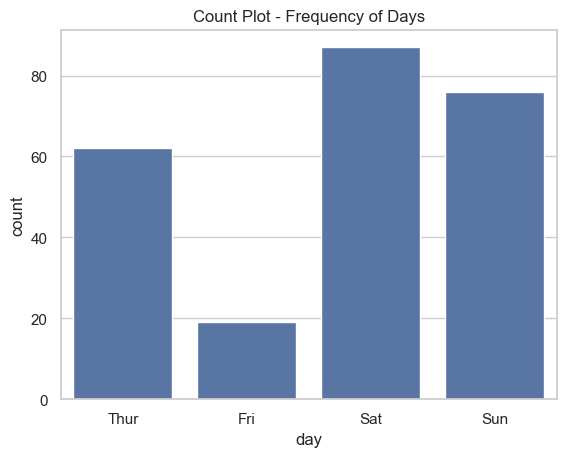

In [6]:
# Count Plot - Frequency of Days
sns.countplot(x='day', data=tips)
plt.title('Count Plot - Frequency of Days')
plt.show()

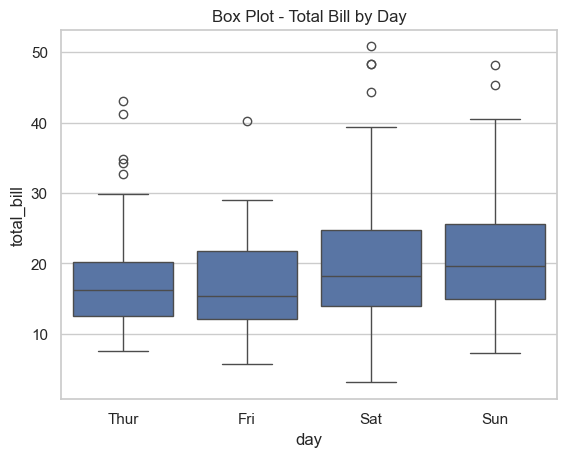

In [7]:
# Box Plot - Total Bill by Day
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title('Box Plot - Total Bill by Day')
plt.show()

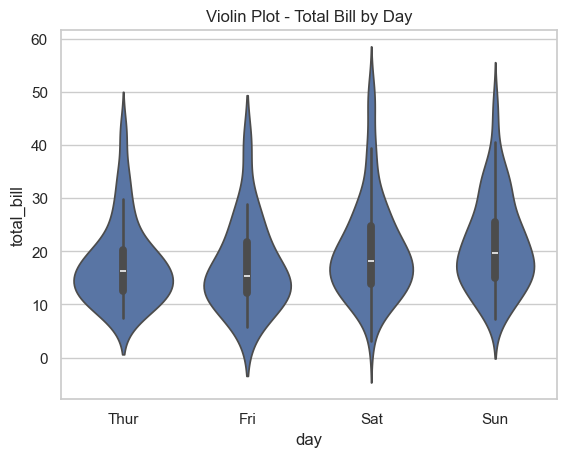

In [8]:
# Violin Plot - Distribution + Summary
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title('Violin Plot - Total Bill by Day')
plt.show()

4. Relationship Plots (Why: see how two numeric variables relate)
Scatterplot (sns.scatterplot): point cloud to inspect correlation.
Lineplot (sns.lineplot): trends over an ordered variable.
Relplot (sns.relplot): figure-level interface for relational plots; supports faceting.

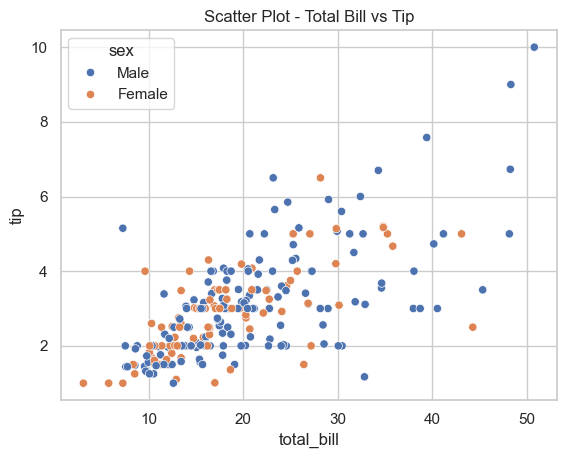

In [9]:
# Scatter Plot - Total Bill vs Tip
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')
plt.title('Scatter Plot - Total Bill vs Tip')
plt.show()

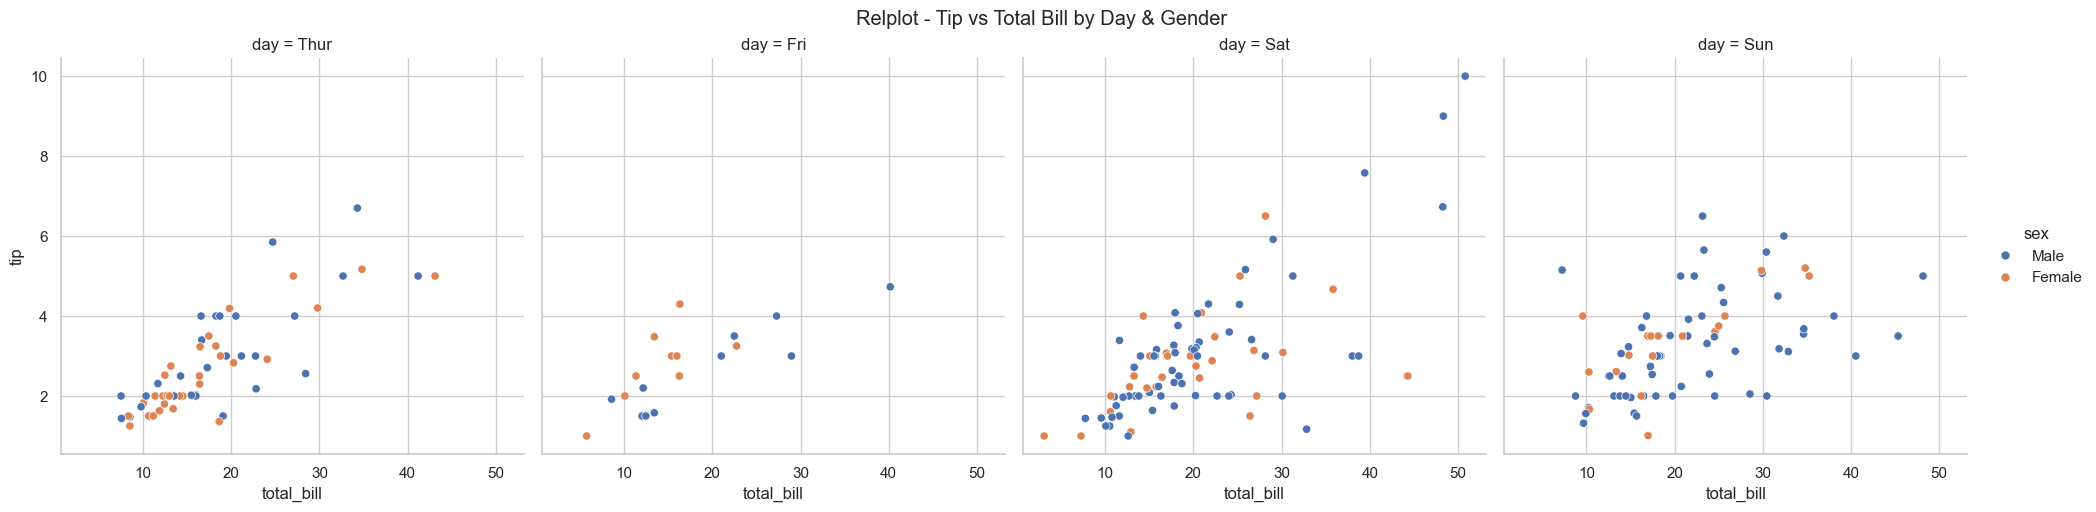

In [10]:
# Relplot with Facets
sns.relplot(x='total_bill', y='tip', hue='sex', col='day', data=tips)
plt.suptitle('Relplot - Tip vs Total Bill by Day & Gender', y=1.02)
plt.show()

Matrix & Correlation Plots (Why: inspect relationships between many variables)
Heatmap (sns.heatmap): visualize correlation matrix or any 2D numerical table.
Clustermap (sns.clustermap): heatmap + hierarchical clustering to find groups.

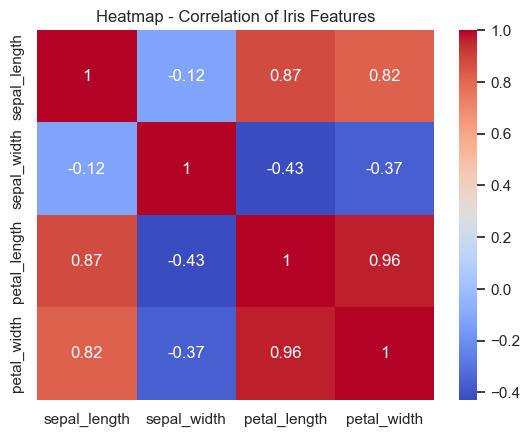

In [11]:
# Select only numeric columns
iris_num = iris.select_dtypes(include=['float', 'int'])
# Compute correlation
corr = iris_num.corr()
# Plot the heatmap
sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title("Heatmap - Correlation of Iris Features")
plt.show()
 

Customer Support Dataset Description 

1. Overview 

The dataset contains 85,907 records with 20 columns. It captures details about customer issues, support channels, agent performance, product information, and satisfaction scores. It is suitable for exploratory data analysis, trend detection, and operational performance tracking. 

2. Column Groups 
A. Identifiers 
Unique id and Order_id identify each record and order. 
Mainly used for reference, not for visualization. 
B. Channel and Category 
channel_name, category, and Sub-category show how and where issues are reported. 
Useful for understanding issue distribution and segmentation. 
C. Time Information 
order_date_time, Issue_reported at, issue_responded, Survey_response_Date track when the order was placed, issue reported, response given, and survey completed. 
Supports time-based analysis like daily or monthly trends. 
D. Customer and Product 
Customer_City, Product_category, Item_price describe customer and product details. 
Useful for grouping, segmentation, and price pattern analysis. 
E. Operational Performance 
connected_handling_time, Agent_name, Supervisor, Manager, Tenure Bucket, Agent Shift contain information about agent performance and work shifts. 
Supports performance comparison between teams or shifts. 
F. Feedback 
CSAT Score measures customer satisfaction. 
Customer Remarks gives qualitative feedback. 
Important for understanding customer experience. 

 

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Customer_support_data.csv")
df.head()


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [15]:
df.info()
df.describe()
df.isnull().sum()
print("Unique Orders:", df['Order_id'].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [17]:
# Check for duplicate orders
print("Duplicate Orders:", df['Order_id'].duplicated().sum())


Duplicate Orders: 18231


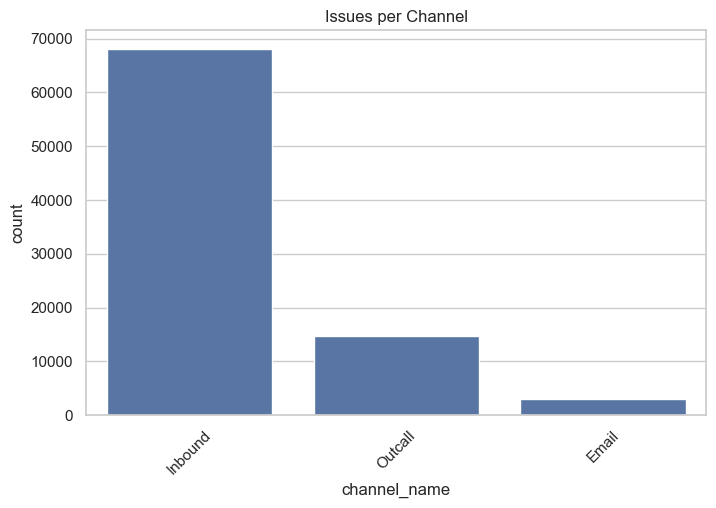

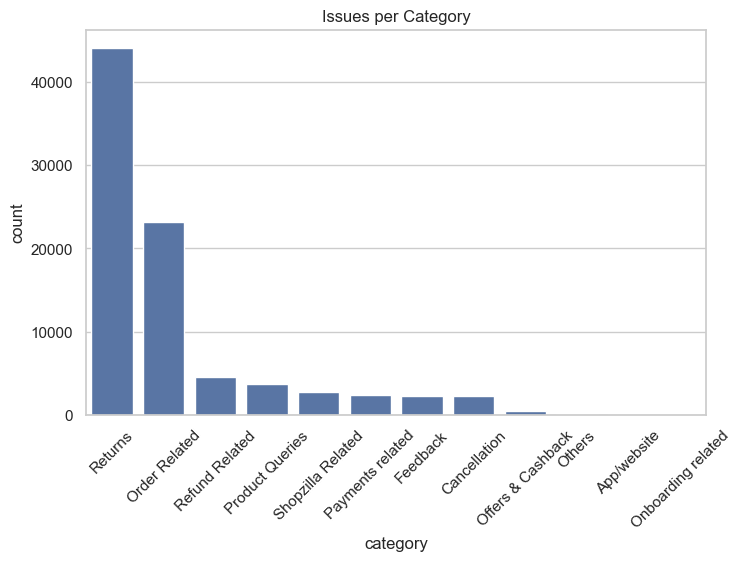

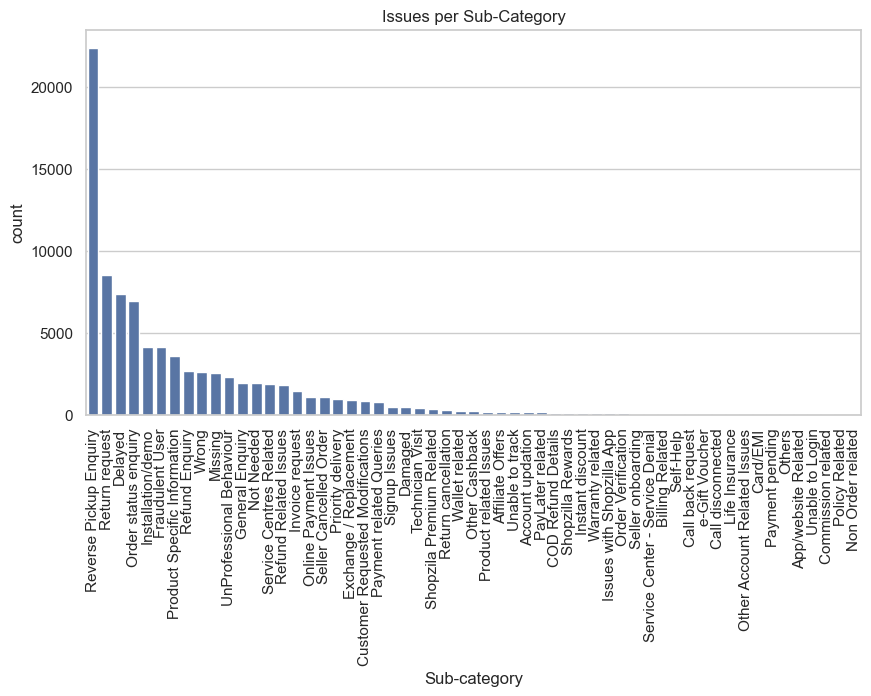

In [18]:
# Count of issues per channel
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='channel_name', order=df['channel_name'].value_counts().index)
plt.title("Issues per Channel")
plt.xticks(rotation=45)
plt.show()

# Count of issues per category
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title("Issues per Category")
plt.xticks(rotation=45)
plt.show()

# Count of sub-categories
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Sub-category', order=df['Sub-category'].value_counts().index)
plt.title("Issues per Sub-Category")
plt.xticks(rotation=90)
plt.show()


In [25]:
print(df.columns)

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score', 'order_date', 'order_month'],
      dtype='object')


3. Data Types
• Categorical: channel_name, category, Agent Shift, Tenure Bucket
• Numerical: Item_price, connected_handling_time, CSAT Score
• Temporal: order_date_time, Issue_reported at, issue_responded,
Survey_response_Date
• Text: Customer Remarks

In [2]:
import pandas as pd

df = pd.read_csv("Customer_support_data.csv")

print("✅ Dataset Loaded Successfully\n")
print("Shape:", df.shape)
print("Columns:", list(df.columns))

print("\nSample Data:")
display(df.sample(3))

print("\nSummary Info:")
print(df.dtypes.value_counts())

print("\nMissing Values (Top 10):")
print(df.isnull().sum().sort_values(ascending=False).head(10))

categorical_cols = ['channel_name', 'category', 'Agent Shift', 'Tenure Bucket']
date_cols = ['order_date_time', 'Issue_reported_at', 'issue_responded', 'Survey_response_Date']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

print("\nUnique Categories:")
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()}")

print("\n✅ Basic checks completed.")


✅ Dataset Loaded Successfully

Shape: (85907, 20)
Columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']

Sample Data:


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
57214,884d9871-2665-4cbe-9af8-4b1120cad73f,Inbound,Order Related,Order status enquiry,NaN,65fdc308-7391-4c21-b24a-6b8c8e476c61,NaN,22/08/2023 22:30,22/08/2023 22:32,22-Aug-23,NaN,NaN,NaN,NaN,Teresa George,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
14390,7c62e040-4067-460f-977e-84814ddacf29,Inbound,Returns,Reverse Pickup Enquiry,Very nice ??,b2c29a65-88ef-4b9f-9503-776363c6e2ec,NaN,07/08/2023 07:11,07/08/2023 07:23,07-Aug-23,NaN,NaN,NaN,NaN,Luis Werner,Brayden Wong,John Smith,>90,Morning,5
72275,d3bb1a03-6cdd-4058-83f3-098f285afa70,Inbound,Returns,Reverse Pickup Enquiry,NaN,NaN,NaN,27/08/2023 14:00,27/08/2023 14:10,27-Aug-23,NaN,NaN,NaN,NaN,Kenneth Murphy,Carter Park,Jennifer Nguyen,On Job Training,Evening,3



Summary Info:
object     17
float64     2
int64       1
Name: count, dtype: int64

Missing Values (Top 10):
connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Unique id                      0
Sub-category                   0
category                       0
dtype: int64


C:\Users\Srin\AppData\Local\Temp\ipykernel_18376\433766843.py:23: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')



Unique Categories:
channel_name: 3
category: 12
Agent Shift: 5
Tenure Bucket: 5

✅ Basic checks completed.


C:\Users\Srin\AppData\Local\Temp\ipykernel_18376\433766843.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


4. Analysis Focus
• Univariate analysis to study distributions such as most common categories,
channels, and score patterns.
• Bivariate analysis to explore relationships like handling time versus satisfaction
score or channel versus CSAT.
• Time series analysis to understand how issues and performance change over time.

C:\Users\Srin\AppData\Local\Temp\ipykernel_18376\2760298289.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\Srin\AppData\Local\Temp\ipykernel_18376\2760298289.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


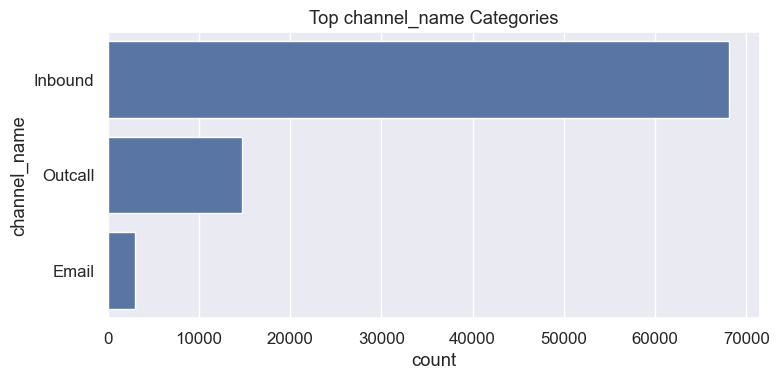

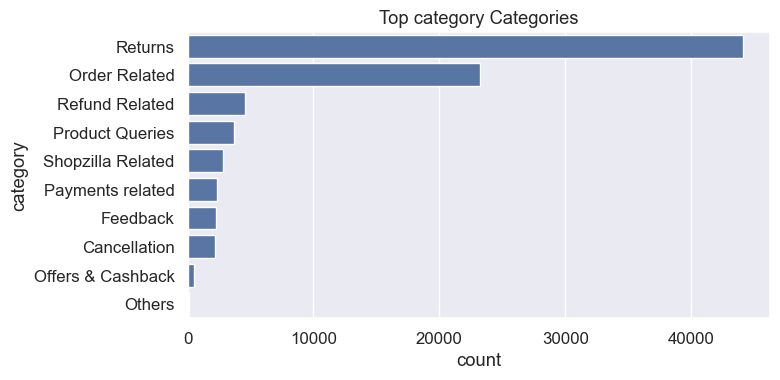

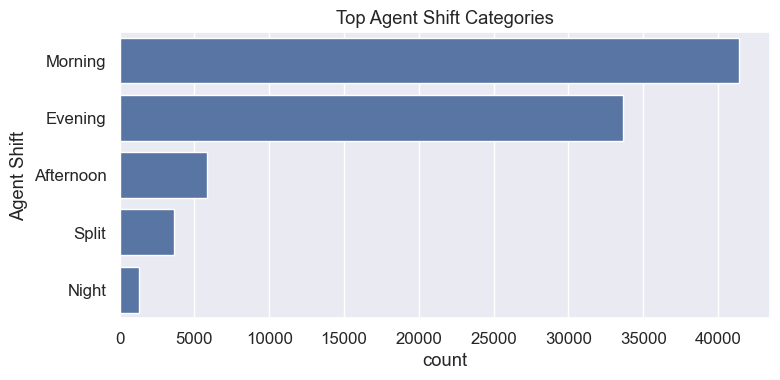

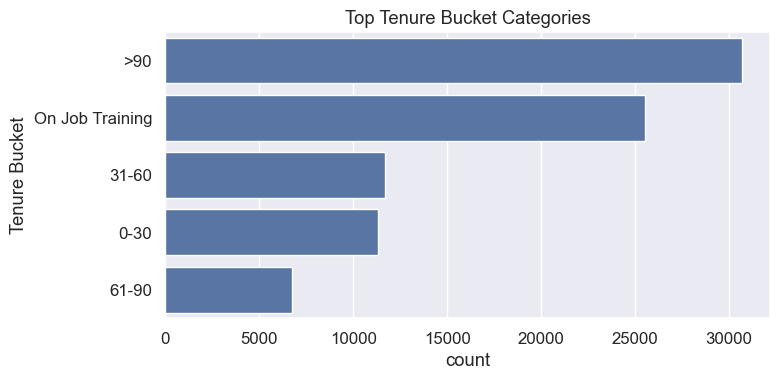

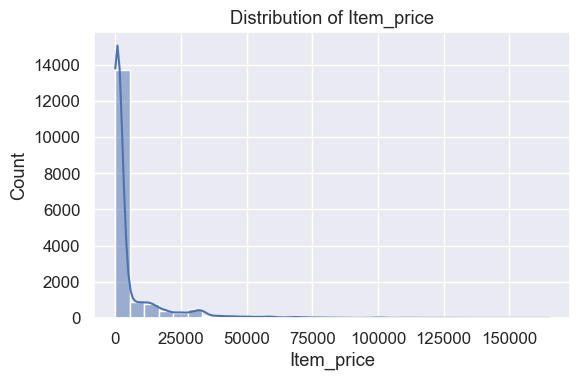

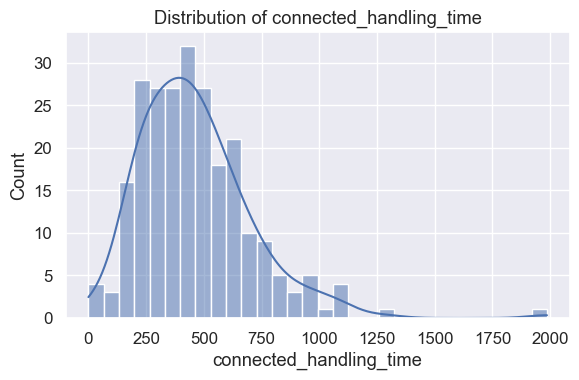

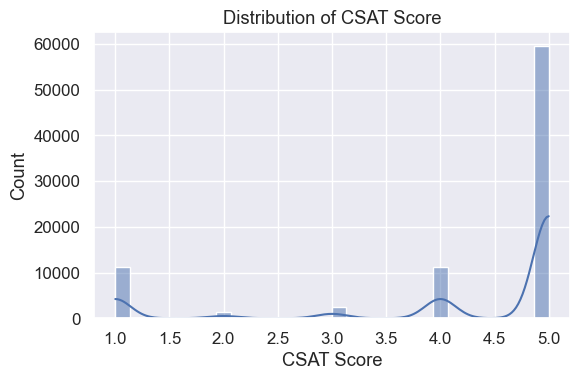

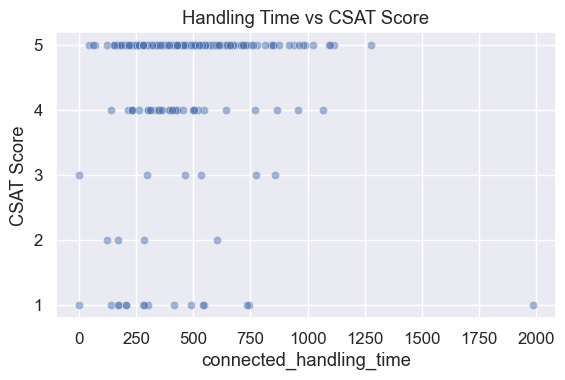

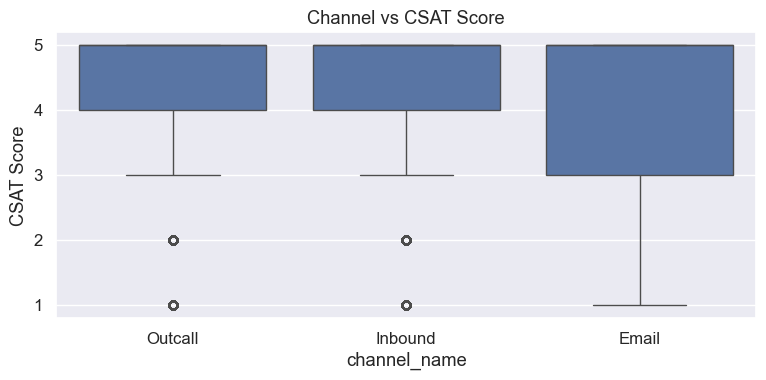

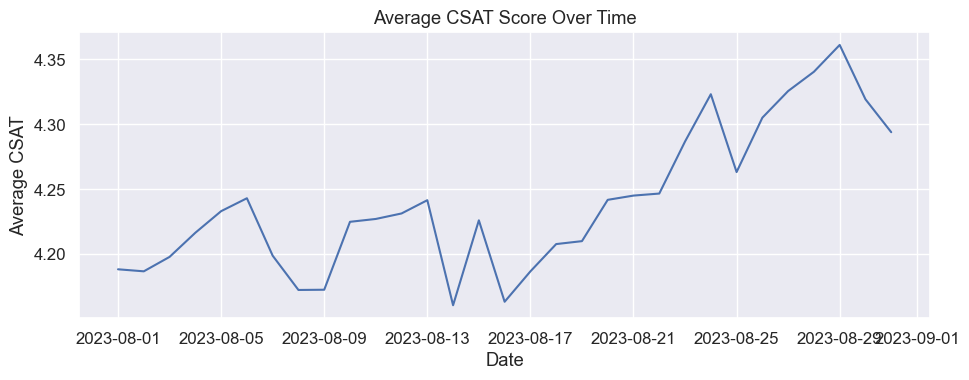

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Customer_support_data.csv")

date_cols = ['order_date_time', 'Issue_reported_at', 'issue_responded', 'Survey_response_Date']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

plt.style.use('ggplot')
sns.set(font_scale=1.1)

# Univariate Analysis
cat_cols = ['channel_name', 'category', 'Agent Shift', 'Tenure Bucket']
num_cols = ['Item_price', 'connected_handling_time', 'CSAT Score']

for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10])
        plt.title(f"Top {col} Categories")
        plt.tight_layout()
        plt.show()

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()

# Bivariate Analysis
if 'connected_handling_time' in df.columns and 'CSAT Score' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x='connected_handling_time', y='CSAT Score', alpha=0.5)
    plt.title("Handling Time vs CSAT Score")
    plt.tight_layout()
    plt.show()

if 'channel_name' in df.columns and 'CSAT Score' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='channel_name', y='CSAT Score')
    plt.title("Channel vs CSAT Score")
    plt.tight_layout()
    plt.show()

# Time Series Analysis
if 'Issue_reported_at' in df.columns:
    df['Issue_reported_date'] = df['Issue_reported_at'].dt.date
    issue_trend = df.groupby('Issue_reported_date').size()
    plt.figure(figsize=(10,4))
    issue_trend.plot()
    plt.title("Issues Reported Over Time")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

if 'Survey_response_Date' in df.columns and 'CSAT Score' in df.columns:
    daily_csat = df.groupby(df['Survey_response_Date'].dt.date)['CSAT Score'].mean()
    plt.figure(figsize=(10,4))
    daily_csat.plot()
    plt.title("Average CSAT Score Over Time")
    plt.xlabel("Date")
    plt.ylabel("Average CSAT")
    plt.tight_layout()
    plt.show()


Visualization Task (seaborn Matplotlib) 

In [29]:
df.head

<bound method NDFrame.head of                                   Unique id channel_name         category  \
0      7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1      b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2      200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3      eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4      ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   
...                                     ...          ...              ...   
85902  505ea5e7-c475-4fac-ac36-1d19a4cb610f      Inbound   Refund Related   
85903  44b38d3f-1523-4182-aba2-72917586647c      Inbound    Order Related   
85904  723bce2c-496c-4aa8-a64b-ca17004528f0      Inbound    Order Related   
85905  707528ee-6873-4192-bfa9-a491f1c08ab5      Inbound         Feedback   
85906  07c7a878-0d5a-42e0-97ef-de59abec0238      Inbound          Returns   

                       Sub-category          

A. Numerical Columns (Item_price, connected_handling_time, CSAT Score) 

1. “Show me the distribution of Item_price.” → Histogram 

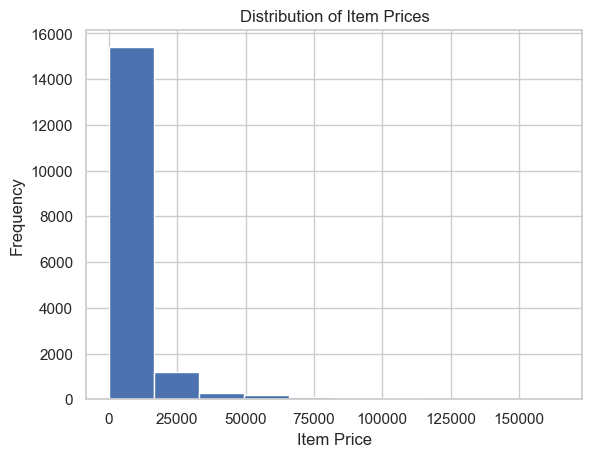

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['Item_price'])

plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.title('Distribution of Item Prices')
plt.show()

In [33]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

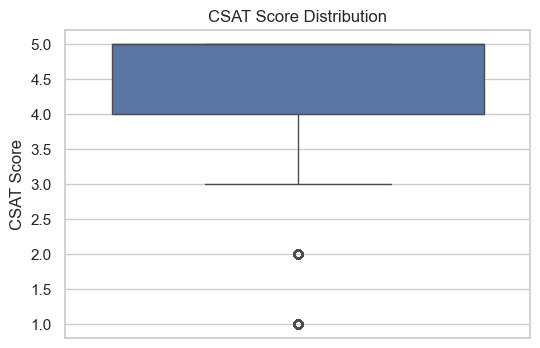

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['CSAT Score'])
plt.title('CSAT Score Distribution')
plt.ylabel('CSAT Score')
plt.show()

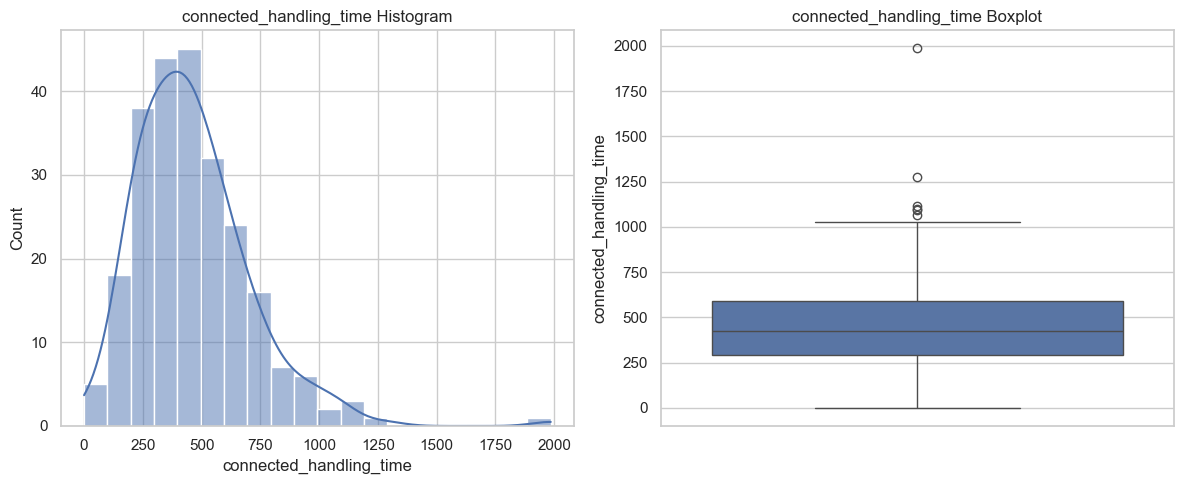

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['connected_handling_time'], bins=20, kde=True)
plt.title('connected_handling_time Histogram')
plt.xlabel('connected_handling_time')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.boxplot(y=df['connected_handling_time'])
plt.title('connected_handling_time Boxplot')
plt.ylabel('connected_handling_time')

plt.tight_layout()
plt.show()

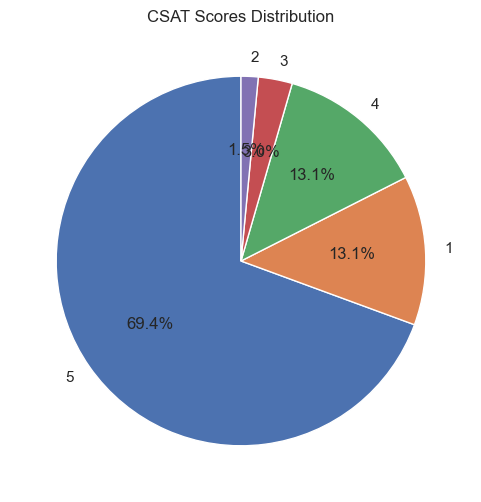

In [36]:
csat_counts = df['CSAT Score'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(csat_counts, labels=csat_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('CSAT Scores Distribution')
plt.show()


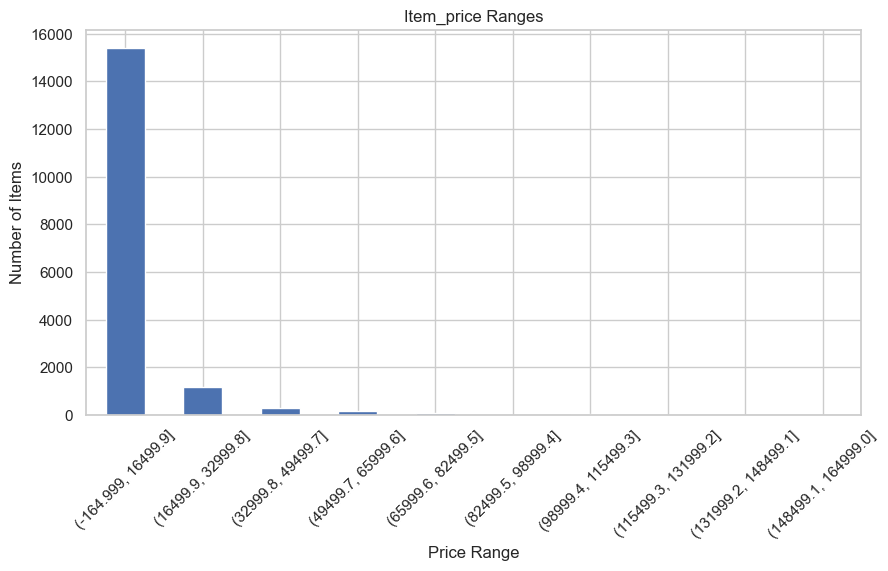

In [37]:
price_bins = pd.cut(df['Item_price'], bins=10)  # You can adjust the number of bins
price_counts = price_bins.value_counts().sort_index()
plt.figure(figsize=(10,5))
price_counts.plot(kind='bar')
plt.title('Item_price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.show()

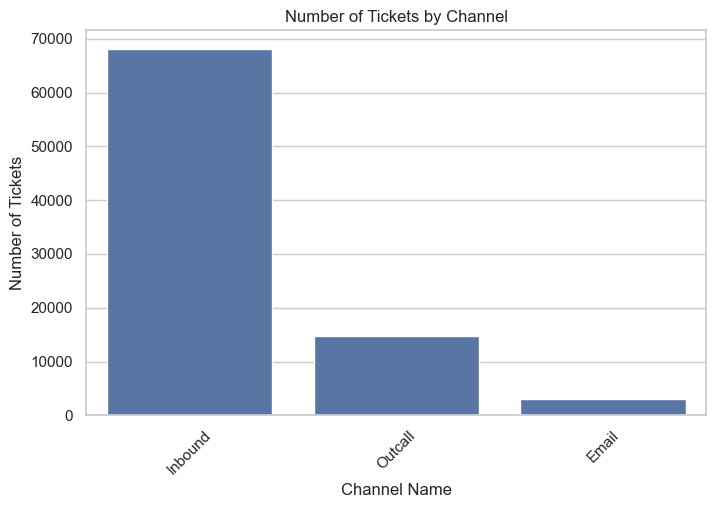

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='channel_name', order=df['channel_name'].value_counts().index)
plt.title('Number of Tickets by Channel')
plt.xlabel('Channel Name')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()

B. Categorical Columns (channel_name, category, Sub-category, Agent Shift, Tenure Bucket) 
 6. “How many tickets come from each channel_name?” → Bar chart 
 7. “Which category has the highest number of tickets?” → Bar chart (sorted) 
 8. “Show me the distribution of tickets by Agent Shift.” → Pie chart 
 9. “What are the top 10 Sub-category values?” → Horizontal bar chart 
 10. “How many tickets belong to each Tenure Bucket?” → Bar chart 

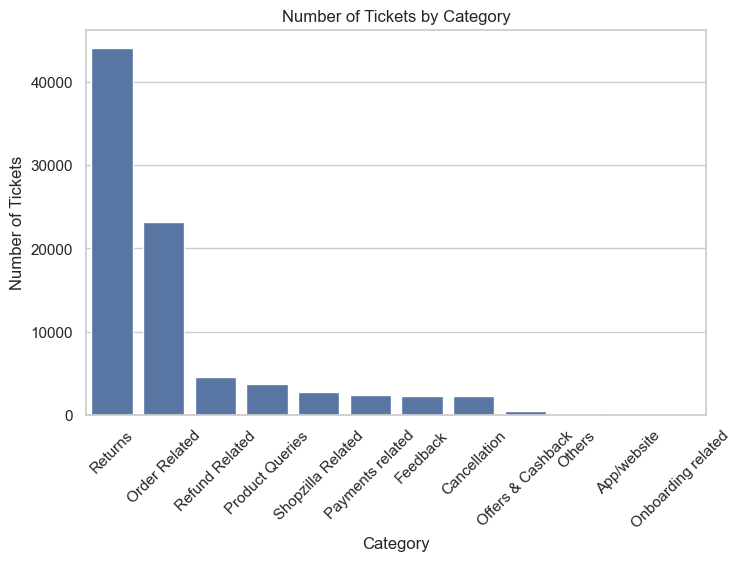

In [39]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Tickets by Category')
plt.xlabel('Category')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()

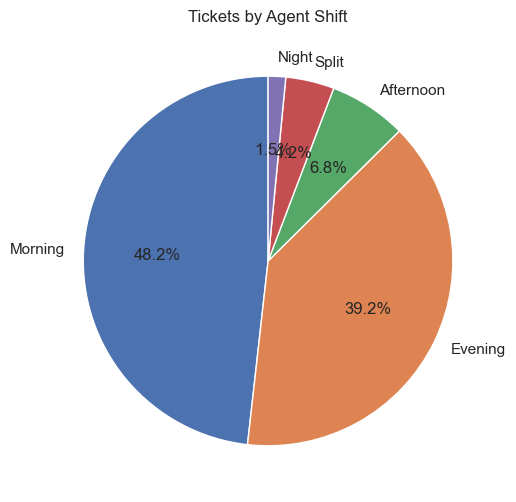

In [40]:
agent_shift_counts = df['Agent Shift'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(agent_shift_counts, labels=agent_shift_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tickets by Agent Shift')
plt.show()


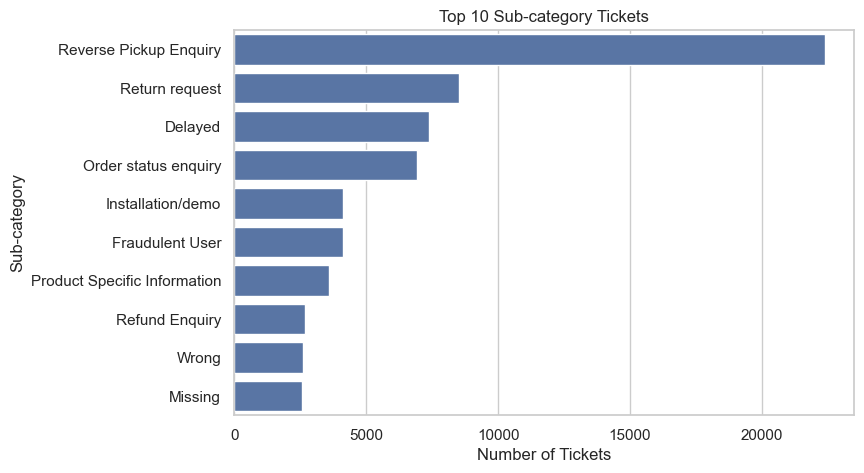

In [41]:
subcat_counts = df['Sub-category'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=subcat_counts.values, y=subcat_counts.index)
plt.title('Top 10 Sub-category Tickets')
plt.xlabel('Number of Tickets')
plt.ylabel('Sub-category')
plt.show()

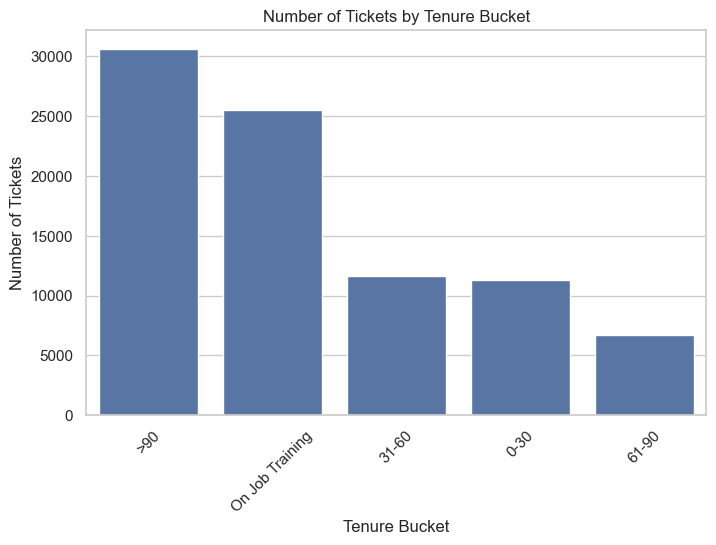

In [42]:
tenure_counts = df['Tenure Bucket'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=tenure_counts.index, y=tenure_counts.values)
plt.title('Number of Tickets by Tenure Bucket')
plt.xlabel('Tenure Bucket')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()